In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt   
import folium 
import seaborn as sns 
plt.style.use('seaborn')
import plotly.express as px
import scipy.stats as stats

In [5]:
df_house = pd.read_csv('kc_house_data.csv')
df_house_1 = pd.read_csv('kc_house_data.csv')
df_house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
#clean date
clean_date = df_house.date.apply(lambda x: x.split('T')[0])
clean_date

#clean date column
df_house['date'] = clean_date
df_house.head()

#format date column
df_house['date'] = pd.to_datetime(df_house['date'], format = '%Y/%m/%d')
df_house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
df_house.sort_values(['date'])

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
16768,5561000190,2014-05-02,437500.0,3,2.25,1970,35100,2.0,0,0,...,9,1970,0,1977,0,98027,47.4635,-121.991,2340,35100
9596,472000620,2014-05-02,790000.0,3,2.50,2600,4750,1.0,0,0,...,9,1700,900,1951,0,98117,47.6833,-122.400,2380,4750
9587,1024069009,2014-05-02,675000.0,5,2.50,2820,67518,2.0,0,0,...,8,2820,0,1979,0,98029,47.5794,-122.025,2820,48351
20602,7853361370,2014-05-02,555000.0,4,2.50,3310,6500,2.0,0,0,...,8,3310,0,2012,0,98065,47.5150,-121.870,2380,5000
11577,5056500260,2014-05-02,440000.0,4,2.25,2160,8119,1.0,0,0,...,8,1080,1080,1966,0,98006,47.5443,-122.177,1850,9000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7898,1422700040,2015-05-14,183000.0,3,1.00,1170,7320,1.0,0,0,...,7,1170,0,1962,0,98188,47.4685,-122.282,2040,7320
928,8730000270,2015-05-14,359000.0,2,2.75,1370,1140,2.0,0,0,...,8,1080,290,2009,0,98133,47.7052,-122.343,1370,1090
5637,7923600250,2015-05-15,450000.0,5,2.00,1870,7344,1.5,0,0,...,7,1870,0,1960,0,98007,47.5951,-122.144,1870,7650
13053,5101400871,2015-05-24,445500.0,2,1.75,1390,6670,1.0,0,0,...,6,720,670,1941,0,98115,47.6914,-122.308,920,6380


In [8]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null datetime64[ns]
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(15)
memory usage: 3.5 MB


In [9]:
#change price to int
df_house.price = df_house.price.astype(np.int64)
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null datetime64[ns]
price            21613 non-null int64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(16)
memory usage: 3.5 MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7f0b5ab2b0>,
      dtype=object)

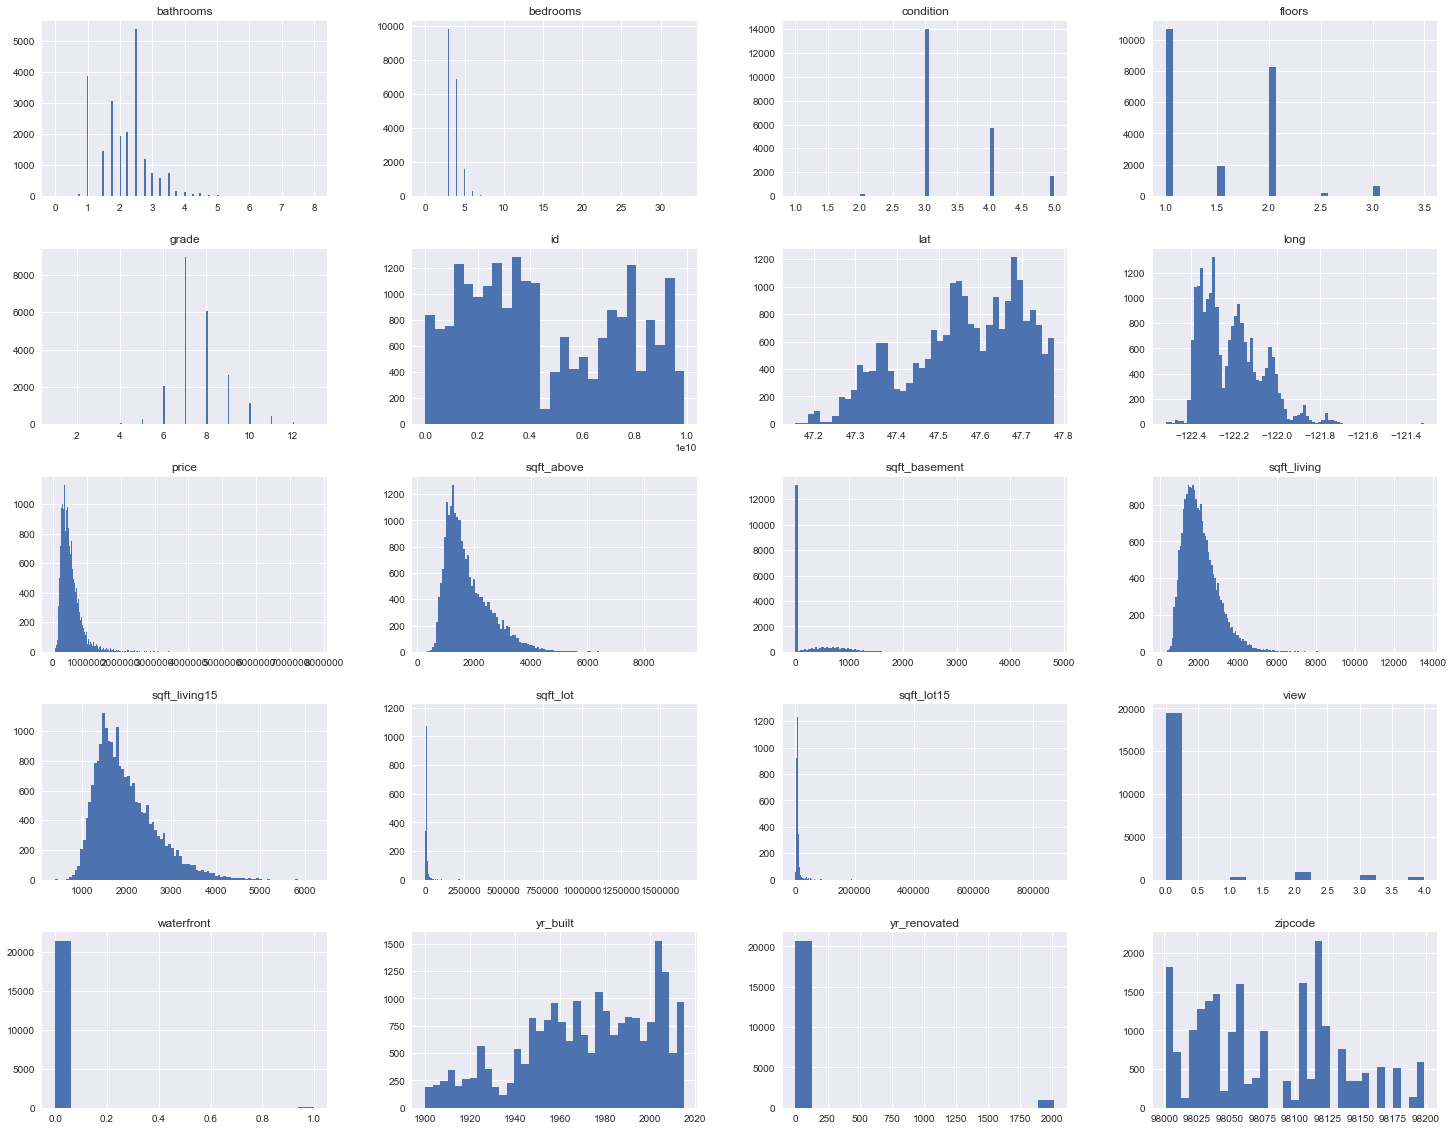

In [10]:
df_house.hist(figsize=(25,20), bins='auto')

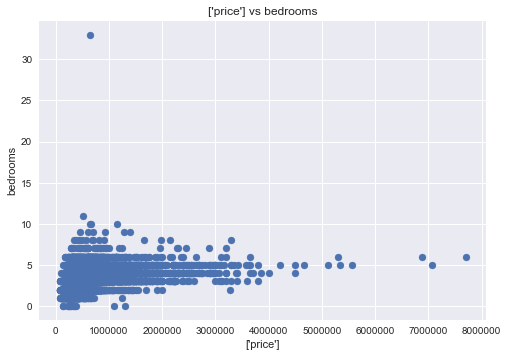

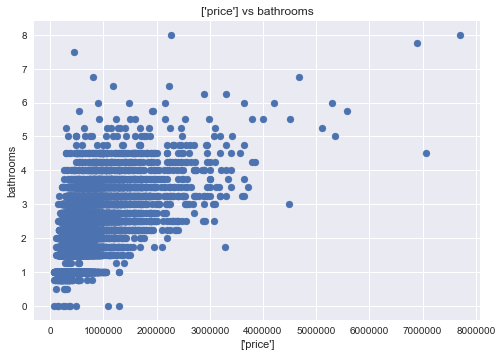

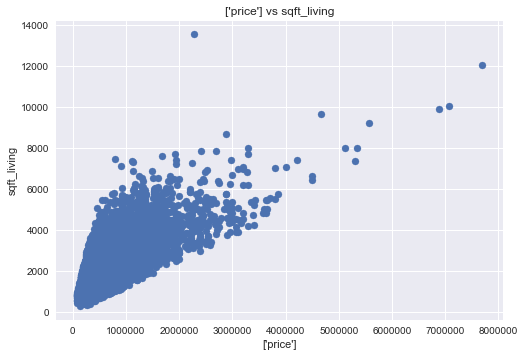

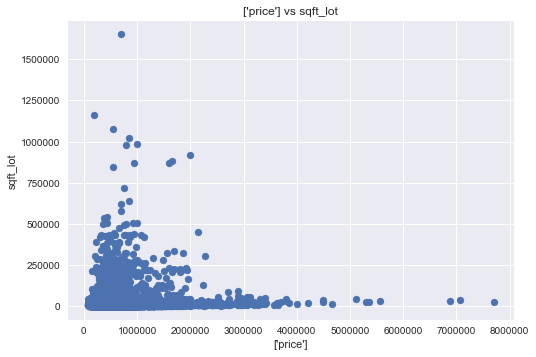

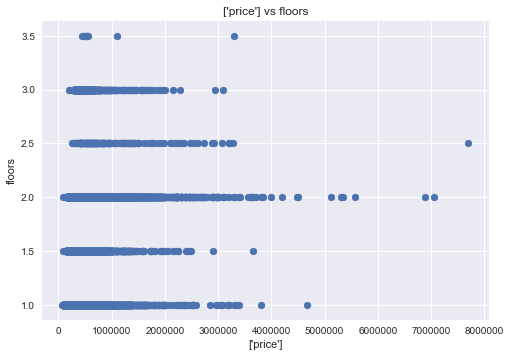

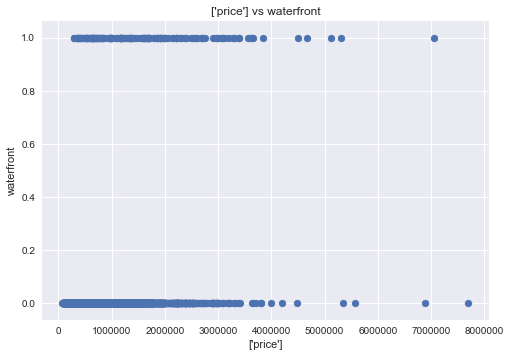

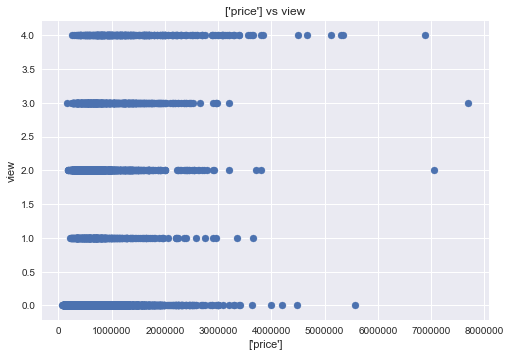

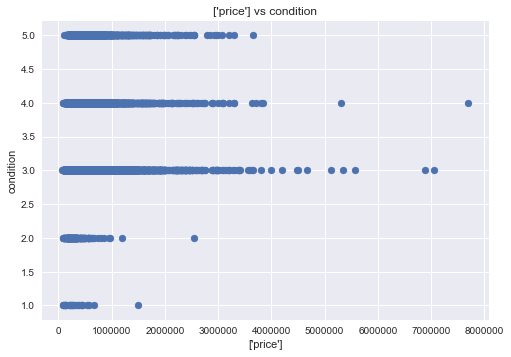

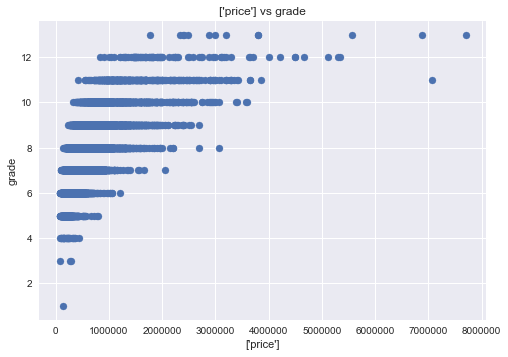

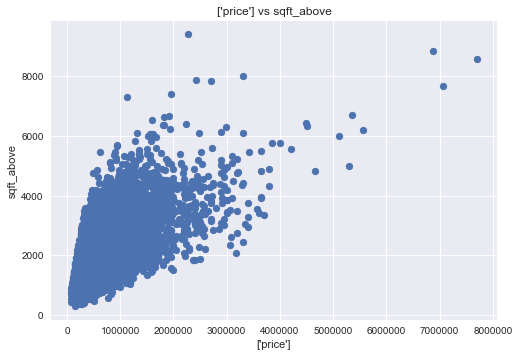

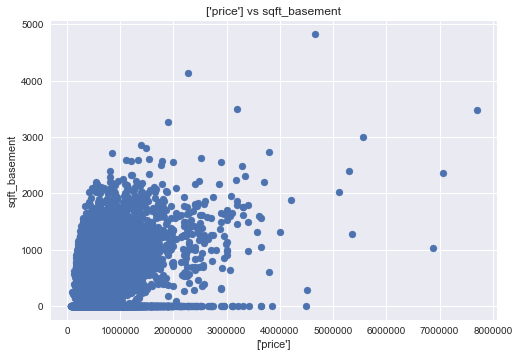

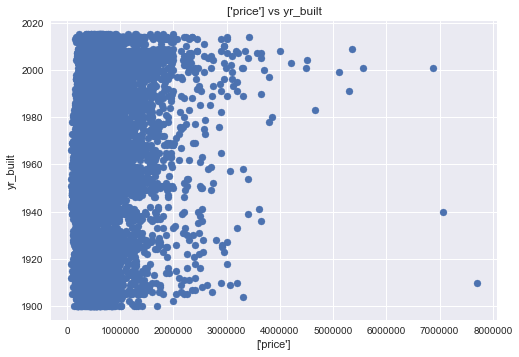

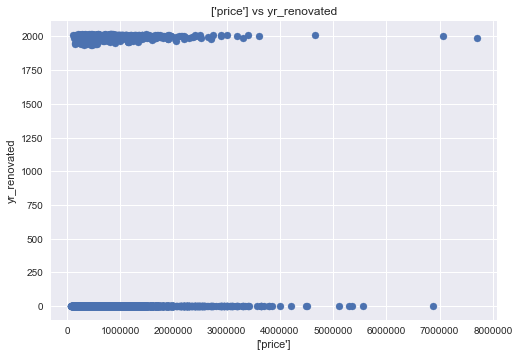

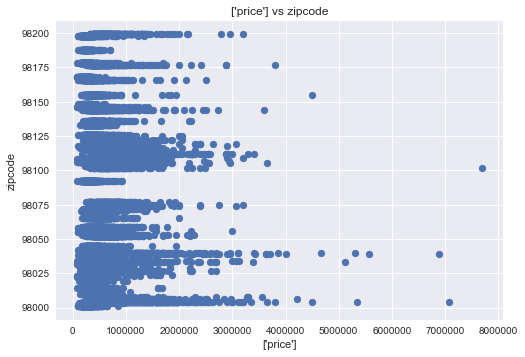

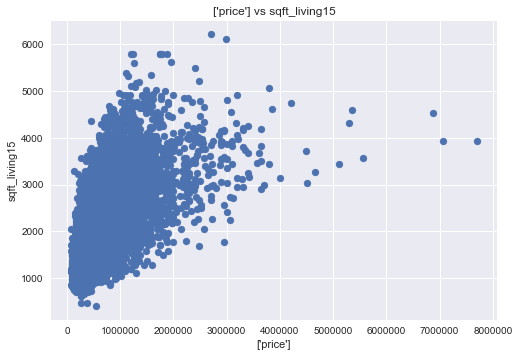

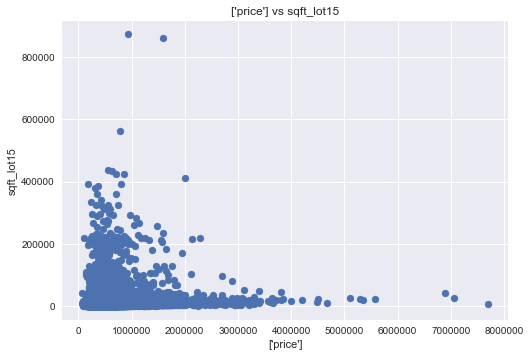

In [11]:
#loop for scatter plots showing relationship to price  

columns = ['price','bedrooms','bathrooms','sqft_living','sqft_lot',
              'floors','waterfront','view','condition','grade',
              'sqft_above','sqft_basement','yr_built','yr_renovated',
              'zipcode','sqft_living15','sqft_lot15']

y_columns = ['bedrooms','bathrooms','sqft_living','sqft_lot',
              'floors','waterfront','view','condition','grade',
              'sqft_above','sqft_basement','yr_built','yr_renovated',
              'zipcode','sqft_living15','sqft_lot15']

x_col = ["price"]



for y_col in y_columns:

    figure = plt.figure
    ax = plt.gca()
    ax.scatter(df_house[x_col], df_house[y_col])
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.set_title("{} vs {}".format(x_col, y_col))

    plt.show()

In [12]:
df_house.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [13]:
df_house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [14]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms

In [15]:
#baseline model - vinilla model

f = f'price~bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+view+condition+grade+sqft_above+sqft_basement+yr_built+yr_renovated+zipcode+sqft_living15+sqft_lot15'
model = smf.ols(formula=f, data=df_house).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     2718.
Date:                Tue, 17 Nov 2020   Prob (F-statistic):               0.00
Time:                        15:38:02   Log-Likelihood:            -2.9614e+05
No. Observations:               21613   AIC:                         5.923e+05
Df Residuals:                   21597   BIC:                         5.924e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      6.882e+06   3.13e+06      2.200      0.028     7.5e+05     1.3e+07
bedrooms      -3.933e+04   2030.045    -19.375      0.000   -4.33e+04   -3.54e+04
bathrooms      4.574e+04   3492.476     13.097      0.000    3.89e+04    5.26e+04
sqft_living     109.2887      2.437     44.846      0.000     104.512     114.065
sqft_lot         -0.0020      0.051     -0.039      0.969      -0.103       0.099
floors         2.702e+04   3835.684      7.044      0.000    1.95e+04    3.45e+04
waterfront      5.79e+05   1.86e+04     31.067      0.000    5.42e+05    6.16e+05
view           4.329e+04   2285.599     18.939      0.000    3.88e+04    4.78e+04
condition      1.943e+04   2521.634      7.706      0.000    1.45e+04    2.44e+04
grade          1.198e+05   2254.819     53.111      0.000    1.15e+05    1.24e+05
sqft_above       51.4626      2.370     21.717      0.000      46.818      56.107
sqft_basement    57.8323      2.805     20.619      0.000      52.335      63.330
yr_built      -3575.2076     74.612    -47.917      0.000   -3721.454   -3428.962
yr_renovated     10.1113      3.920      2.579      0.010       2.428      17.795
zipcode          -6.9024     31.400     -0.220      0.826     -68.449      54.644
sqft_living15    24.7385      3.652      6.773      0.000      17.580      31.897
sqft_lot15       -0.5511      0.078     -7.029      0.000      -0.705      -0.397
==============================================================================
Omnibus:                    16326.449   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1194055.642
Skew:                           3.029   Prob(JB):                         0.00
Kurtosis:                      38.906   Cond. No.                     3.56e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.72e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [23]:
#all variables that have 6 unique values or lower will become catgorical
cat_var = ['floors', 'waterfront', 'view', 'condition']
con_var = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 
           'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built',
           'sqft_living15','sqft_lot15']

id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

In [71]:
df_house_3 = pd.DataFrame(df_house)

In [72]:
df_house_3.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [74]:
#remove outliers
z_scores = stats. zscore(df_house)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 2).all(axis=1)
df_house_1 = df_house[filtered_entries]

In [76]:
df_house_3.drop(['lat', 'long'], axis=1, inplace=True)

In [77]:
df_house_3

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
0,2014-10-13,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,1340,5650
1,2014-12-09,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1690,7639
2,2015-02-25,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,2720,8062
3,2014-12-09,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,1360,5000
4,2015-02-18,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,2014-05-21,360000,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,1530,1509
21609,2015-02-23,400000,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,1830,7200
21610,2014-06-23,402101,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,1020,2007
21611,2015-01-16,400000,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,1410,1287


In [79]:
#remove Outliers
from numpy import mean
from numpy import std

In [88]:
# calculate summary statistics
data_mean, data_std = mean(df_house_3.price), std(df_house_3.price)
# identify outliers
cut_off = data_std * 2
lower, upper = data_mean - cut_off, data_mean + cut_off

In [89]:
# identify outliers
outliers = [x for x in df_house_3.price if x < lower or x > upper]

In [93]:
#removing all houses that are outliers (outside 2 standard diviations of the mean)
sorted(outliers)

[1274950,
 1275000,
 1275000,
 1275000,
 1275000,
 1275000,
 1275000,
 1275000,
 1278000,
 1280000,
 1280000,
 1280000,
 1280000,
 1280000,
 1280000,
 1280000,
 1280000,
 1280600,
 1284000,
 1285000,
 1285000,
 1285000,
 1285000,
 1285000,
 1288000,
 1288000,
 1288000,
 1289000,
 1289000,
 1289000,
 1289990,
 1290000,
 1290000,
 1295000,
 1295000,
 1295000,
 1295000,
 1295000,
 1295000,
 1295000,
 1295000,
 1295650,
 1297000,
 1298000,
 1298000,
 1298890,
 1299890,
 1300000,
 1300000,
 1300000,
 1300000,
 1300000,
 1300000,
 1300000,
 1300000,
 1300000,
 1300000,
 1300000,
 1300000,
 1300000,
 1300000,
 1300000,
 1300000,
 1300000,
 1300000,
 1300000,
 1300000,
 1300000,
 1302000,
 1305000,
 1305000,
 1306000,
 1307000,
 1308000,
 1309500,
 1309500,
 1310000,
 1310000,
 1310000,
 1311000,
 1312000,
 1313000,
 1315000,
 1315000,
 1315000,
 1315000,
 1320000,
 1320000,
 1320000,
 1320000,
 1320000,
 1320000,
 1321500,
 1321620,
 1324050,
 1325000,
 1325000,
 1325000,
 1325000,
 1325000,


In [94]:
#removing houses less then $1274950
df_house_3 = df_house_3[df_house_3.price < 1274950]

In [95]:
df_house_3

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
0,2014-10-13,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,1340,5650
1,2014-12-09,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1690,7639
2,2015-02-25,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,2720,8062
3,2014-12-09,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,1360,5000
4,2015-02-18,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,2014-05-21,360000,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,1530,1509
21609,2015-02-23,400000,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,1830,7200
21610,2014-06-23,402101,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,1020,2007
21611,2015-01-16,400000,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,1410,1287


In [99]:
f = f'price~bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+view+condition+grade+sqft_above+sqft_basement+yr_built+sqft_living15+sqft_lot15'
model = smf.ols(formula=f, data=df_house_3).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     2429.
Date:                Tue, 17 Nov 2020   Prob (F-statistic):               0.00
Time:                        17:39:07   Log-Likelihood:            -2.7577e+05
No. Observations:               20770   AIC:                         5.516e+05
Df Residuals:                   20756   BIC:                         5.517e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      4.848e+06   8.94e+04     54.230      0.000    4.67e+06    5.02e+06
bedrooms      -1.452e+04   1377.934    -10.537      0.000   -1.72e+04   -1.18e+04
bathrooms      2.745e+04   2367.813     11.594      0.000    2.28e+04    3.21e+04
sqft_living      50.0198      1.758     28.445      0.000      46.573      53.467
sqft_lot          0.1167      0.035      3.337      0.001       0.048       0.185
floors          5.59e+04   2565.498     21.790      0.000    5.09e+04    6.09e+04
waterfront     1.169e+05   1.76e+04      6.646      0.000    8.24e+04    1.51e+05
view           2.448e+04   1631.034     15.010      0.000    2.13e+04    2.77e+04
condition      1.855e+04   1647.824     11.259      0.000    1.53e+04    2.18e+04
grade           9.66e+04   1537.142     62.842      0.000    9.36e+04    9.96e+04
sqft_above        7.8269      1.679      4.662      0.000       4.536      11.118
sqft_basement    42.1928      1.947     21.666      0.000      38.376      46.010
yr_built      -2784.4892     46.152    -60.333      0.000   -2874.950   -2694.028
sqft_living15    59.2274      2.561     23.128      0.000      54.208      64.247
sqft_lot15       -0.2701      0.053     -5.079      0.000      -0.374      -0.166
==============================================================================
Omnibus:                     1309.400   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2204.398
Skew:                           0.496   Prob(JB):                         0.00
Kurtosis:                       4.250   Cond. No.                     3.75e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.54e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [103]:
df_house_4 = pd.DataFrame(df_house)

In [100]:
# calculate summary statistics
data_mean, data_std = mean(df_house_4.price), std(df_house_4.price)
# identify outliers
cut_off = data_std * 2
lower, upper = data_mean - cut_off, data_mean + cut_off

In [104]:
# identify outliers
outliers = [x for x in df_house_4.price if x < lower or x > upper]

In [106]:
mean(df_house_4.price)

540088.1417665294

In [107]:
std(df_house_4.price)


367118.7031813723

In [108]:
sorted(outliers)

[937000,
 937500,
 937500,
 937500,
 937500,
 937750,
 938000,
 938000,
 939000,
 939000,
 939000,
 939000,
 940000,
 940000,
 940000,
 940000,
 940000,
 940000,
 940000,
 940000,
 940000,
 940000,
 940000,
 940000,
 940000,
 941000,
 941500,
 942000,
 942500,
 942500,
 942990,
 943500,
 945000,
 945000,
 945000,
 945000,
 945000,
 945800,
 946000,
 947500,
 947500,
 948000,
 949000,
 949000,
 949000,
 949880,
 949950,
 949950,
 949990,
 950000,
 950000,
 950000,
 950000,
 950000,
 950000,
 950000,
 950000,
 950000,
 950000,
 950000,
 950000,
 950000,
 950000,
 950000,
 950000,
 950000,
 950000,
 950000,
 950000,
 950000,
 950000,
 950000,
 950000,
 950000,
 950000,
 950000,
 950000,
 950000,
 950000,
 950000,
 950000,
 950000,
 950000,
 950000,
 950000,
 950000,
 950000,
 950000,
 950000,
 950000,
 950000,
 950000,
 950000,
 950000,
 950000,
 950000,
 950968,
 951000,
 951000,
 951250,
 952000,
 952000,
 952000,
 952500,
 952990,
 953007,
 954500,
 955000,
 955000,
 955000,
 955000,
 

In [109]:
df_house_4 = df_house_4[df_house_4.price < 937000]

In [111]:
df_house_4

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,2015-02-23,400000,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,2014-06-23,402101,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,2015-01-16,400000,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [112]:
f = f'price~bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+view+condition+grade+sqft_above+sqft_basement+yr_built+yr_renovated+zipcode+sqft_living15+sqft_lot15'
model = smf.ols(formula=f, data=df_house_4).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     1549.
Date:                Tue, 17 Nov 2020   Prob (F-statistic):               0.00
Time:                        17:45:22   Log-Likelihood:            -2.6055e+05
No. Observations:               19792   AIC:                         5.211e+05
Df Residuals:                   19776   BIC:                         5.212e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.275e+07   1.91e+06     -6.668      0.000   -1.65e+07      -9e+06
bedrooms      -1.105e+04   1271.755     -8.691      0.000   -1.35e+04   -8559.910
bathrooms       2.54e+04   2221.758     11.432      0.000     2.1e+04    2.98e+04
sqft_living      40.0912      1.671     23.991      0.000      36.816      43.367
sqft_lot          0.1411      0.033      4.277      0.000       0.076       0.206
floors         4.958e+04   2398.025     20.675      0.000    4.49e+04    5.43e+04
waterfront     6.082e+04   1.89e+04      3.212      0.001    2.37e+04    9.79e+04
view           1.242e+04   1639.591      7.577      0.000    9209.741    1.56e+04
condition      1.746e+04   1544.503     11.307      0.000    1.44e+04    2.05e+04
grade          8.378e+04   1446.089     57.937      0.000    8.09e+04    8.66e+04
sqft_above        4.5073      1.600      2.818      0.005       1.372       7.642
sqft_basement    35.5932      1.856     19.181      0.000      31.956      39.230
yr_built      -2334.6927     47.221    -49.441      0.000   -2427.251   -2242.135
yr_renovated      2.3334      2.568      0.908      0.364      -2.701       7.368
zipcode         171.5373     19.191      8.938      0.000     133.922     209.153
sqft_living15    60.1857      2.484     24.234      0.000      55.318      65.054
sqft_lot15       -0.1531      0.050     -3.061      0.002      -0.251      -0.055
==============================================================================
Omnibus:                      367.965   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              406.305
Skew:                           0.307   Prob(JB):                     5.91e-89
Kurtosis:                       3.342   Cond. No.                     4.98e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.05e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [114]:
df_house_4.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,0.024341,0.012158,0.031296,0.015767,-0.134617,0.033714,-0.000142,0.017479,-0.028700,0.042194,0.018778,-0.003533,0.028034,-0.020856,-0.006129,0.005736,0.021538,0.018121,-0.145506
price,0.024341,1.000000,0.278789,0.427534,0.588327,0.090483,0.263210,0.036378,0.193722,0.029155,0.600961,0.497267,0.221510,0.061036,0.068197,-0.014350,0.450265,0.083265,0.533487,0.082092
bedrooms,0.012158,0.278789,1.000000,0.485444,0.586352,0.021658,0.146757,-0.035989,0.024216,0.025922,0.307942,0.460353,0.281989,0.160659,-0.002647,-0.148262,-0.039085,0.138607,0.363964,0.018355
bathrooms,0.031296,0.427534,0.485444,1.000000,0.706624,0.055216,0.500085,-0.020820,0.071648,-0.139229,0.600574,0.626845,0.214651,0.555415,0.013467,-0.213266,-0.024331,0.250180,0.515688,0.055797
sqft_living,0.015767,0.588327,0.586352,0.706624,1.000000,0.151227,0.331113,-0.005658,0.141546,-0.075633,0.682362,0.845769,0.375560,0.358950,0.014324,-0.211155,-0.011229,0.291241,0.725858,0.166086
sqft_lot,-0.134617,0.090483,0.021658,0.055216,0.151227,1.000000,-0.021946,0.015045,0.087070,-0.000198,0.082596,0.156120,0.007781,0.037403,0.015552,-0.130729,-0.099945,0.221915,0.143759,0.708997
floors,0.033714,0.263210,0.146757,0.500085,0.331113,-0.021946,1.000000,-0.012039,-0.020195,-0.279614,0.454983,0.526563,-0.303859,0.519698,-0.009523,-0.068418,0.028995,0.138053,0.264193,-0.026320
waterfront,-0.000142,0.036378,-0.035989,-0.020820,-0.005658,0.015045,-0.012039,1.000000,0.289844,0.014585,-0.018784,-0.013574,0.013140,-0.042998,0.056119,0.038845,-0.045082,-0.059895,0.001965,0.033927
view,0.017479,0.193722,0.024216,0.071648,0.141546,0.087070,-0.020195,0.289844,1.000000,0.025334,0.105899,0.048114,0.177534,-0.067436,0.052260,0.097871,-0.037051,-0.073296,0.159518,0.085220
condition,-0.028700,0.029155,0.025922,-0.139229,-0.075633,-0.000198,-0.279614,0.014585,0.025334,1.000000,-0.175962,-0.181187,0.175209,-0.348988,-0.058626,-0.006710,-0.019226,-0.095865,-0.128067,0.005056


In [1]:
length(dataset$yr_renovated[dataset$yr_renovated == 0])


SyntaxError: invalid syntax (<ipython-input-1-67c68584901e>, line 1)